In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from tpot import TPOTRegressor

data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#categorical encoding
data['holiday'] = pd.Categorical(data['holiday']).codes
data['weather_main'] = pd.Categorical(data['weather_main']).codes
data['weather_description'] = pd.Categorical(data['weather_description']).codes
data['year'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
data['month'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
data['day'] = data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
data['hour'] = data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))

data.drop(['date_time'], axis=1, inplace=True)

# split data into X and y
y = data['traffic_volume'].copy(deep=True)
X = data.copy(deep=True)
X.drop(['traffic_volume'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.25,
                                                     shuffle=True,
                                                     random_state=42)

tpot = TPOTRegressor(max_time_mins=60,
                     verbosity=2,
                     n_jobs=-1)
tpot.fit(X_train,y_train)
tpot.export('metro_traffic.py')

Generation 1 - Current best internal CV score: -650228.5821295402
Generation 2 - Current best internal CV score: -650228.5821295402
Generation 3 - Current best internal CV score: -635677.0345186859

64.54626833333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=1, min_samples_split=13, n_estimators=100)


INITIAL DATA REPRESENTATION	
R2 score: 0.8471053876278078
MAE: 505.67496273704126
MSE: 604660.8022084382
RMSE: 777.5993841358403


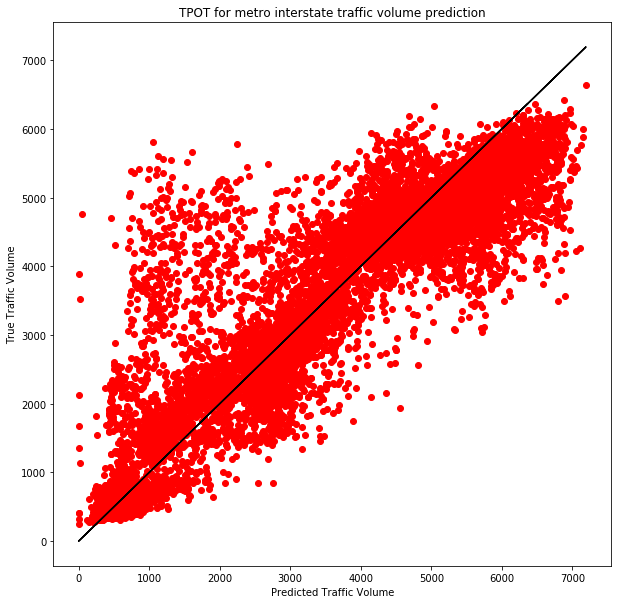

In [30]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt


y_predictions = tpot.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, y_predictions)
mse = sklearn.metrics.mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
print("INITIAL DATA REPRESENTATION\t")
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predictions,color = "red",Label = "Scatter")
plt.plot(y_test,y_test,color = "black",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('TPOT for metro interstate traffic volume prediction')
plt.show()

After 60 Mins of optimisizing the code: 
R2 score: 0.9201430997362164


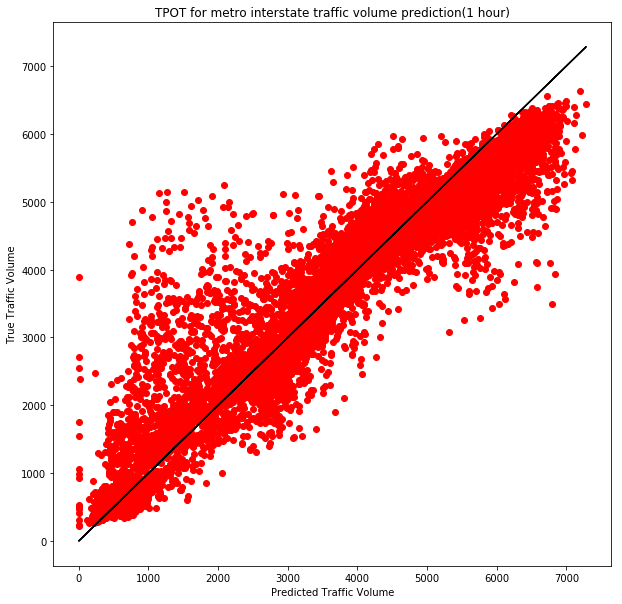

In [41]:
#After executing TpotRegressor() function for 60 minutes 
#we get the following code in metro_traffic.py file

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

tpot_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
tpot_data['holiday'] = pd.Categorical(tpot_data['holiday']).codes
tpot_data['weather_main'] = pd.Categorical(tpot_data['weather_main']).codes
tpot_data['weather_description'] = pd.Categorical(tpot_data['weather_description']).codes
tpot_data['year'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
tpot_data['month'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
tpot_data['day'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
tpot_data['hour'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
tpot_data.drop(['date_time'], axis=1, inplace=True)

a=tpot_data['traffic_volume'].values

features = tpot_data.drop('traffic_volume', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['traffic_volume'].values, random_state=None)

# Average CV score on the training set was:-599357.3392476072
exported_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(bootstrap=False, max_features=0.45, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print("After 60 Mins of optimisizing the code: ")
y_predictions = tpot.predict(testing_features)
r2=sklearn.metrics.r2_score(testing_target, y_predictions)
print("R2 score:", r2)

plt.figure(figsize=(10,10))
plt.scatter(testing_target,y_predictions,color = "red",Label = "Scatter")
plt.plot(testing_target,testing_target,color = "black",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('TPOT for metro interstate traffic volume prediction(1 hour)')
plt.show()

After 420 Mins of optimisizing the code: 
R2 score: 0.9191409802208965


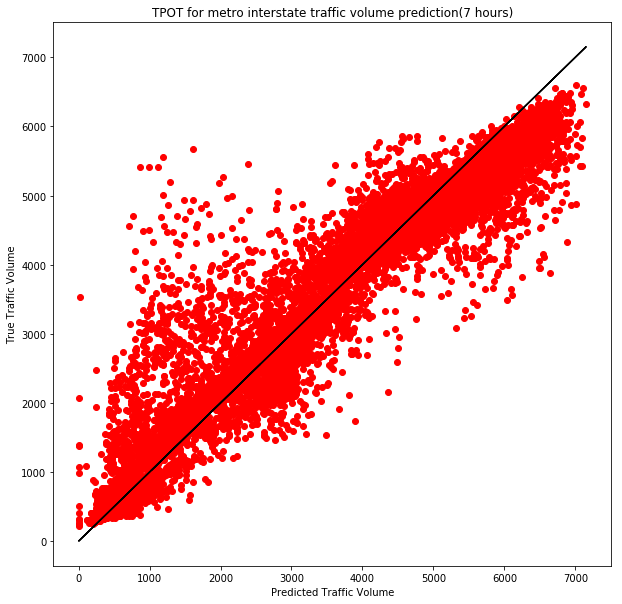

In [43]:
#After executing TpotRegressor() function for 420 minutes(7 hours)
#we get the following code in metro_traffic.py file

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

tpot_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
tpot_data['holiday'] = pd.Categorical(tpot_data['holiday']).codes
tpot_data['weather_main'] = pd.Categorical(tpot_data['weather_main']).codes
tpot_data['weather_description'] = pd.Categorical(tpot_data['weather_description']).codes
tpot_data['year'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
tpot_data['month'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
tpot_data['day'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
tpot_data['hour'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
tpot_data.drop(['date_time'], axis=1, inplace=True)

a=tpot_data['traffic_volume'].values

features = tpot_data.drop('traffic_volume', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['traffic_volume'].values, random_state=None)

# Average CV score on the training set was:-206968.53135966952
exported_pipeline = RandomForestRegressor(bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=9, min_samples_split=19, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print("After 420 Mins of optimisizing the code: ")
y_predictions = tpot.predict(testing_features)
r2=sklearn.metrics.r2_score(testing_target, y_predictions)
print("R2 score:", r2)

plt.figure(figsize=(10,10))
plt.scatter(testing_target,y_predictions,color = "red",Label = "Scatter")
plt.plot(testing_target,testing_target,color = "black",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('TPOT for metro interstate traffic volume prediction(7 hours)')
plt.show()

After 840 Mins of optimisizing the code: 
R2 score: 0.9219235824188594


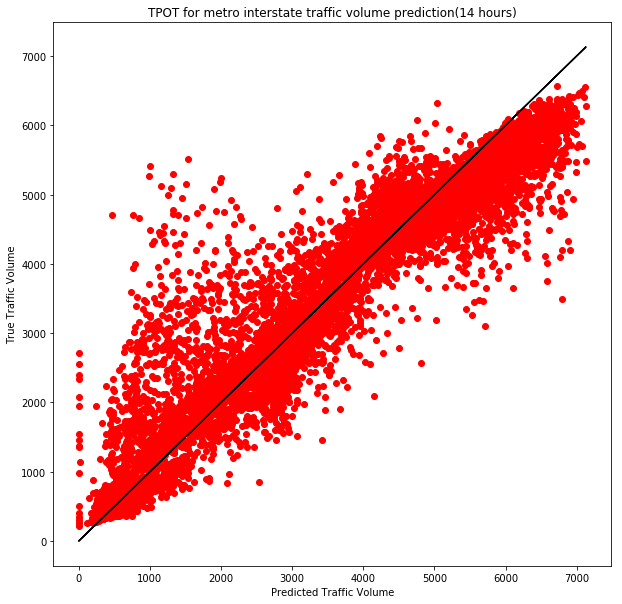

In [47]:
#After executing TpotRegressor() function for 840 minutes(14 hours)
#we get the following code in metro_traffic.py file

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

tpot_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
tpot_data['holiday'] = pd.Categorical(tpot_data['holiday']).codes
tpot_data['weather_main'] = pd.Categorical(tpot_data['weather_main']).codes
tpot_data['weather_description'] = pd.Categorical(tpot_data['weather_description']).codes
tpot_data['year'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
tpot_data['month'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
tpot_data['day'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
tpot_data['hour'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
tpot_data.drop(['date_time'], axis=1, inplace=True)

a=tpot_data['traffic_volume'].values

features = tpot_data.drop('traffic_volume', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['traffic_volume'].values, random_state=None)

# Average CV score on the training set was:-214638.59167606087
exported_pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.8, min_samples_leaf=8, min_samples_split=18, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print("After 840 Mins of optimisizing the code: ")
y_predictions = tpot.predict(testing_features)
r2=sklearn.metrics.r2_score(testing_target, y_predictions)
print("R2 score:", r2)

plt.figure(figsize=(10,10))
plt.scatter(testing_target,y_predictions,color = "red",Label = "Scatter")
plt.plot(testing_target,testing_target,color = "black",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('TPOT for metro interstate traffic volume prediction(14 hours)')
plt.show()

After 1800 Mins of optimisizing the code: 
R2 score: 0.9250189989233896


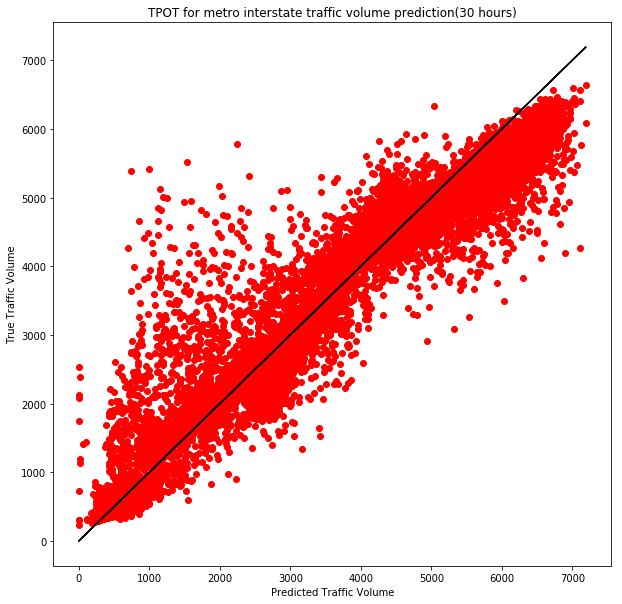

In [58]:
#After executing TpotRegressor() function for 1800 minutes(30 hours)
#we get the following code in metro_traffic.py file

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

tpot_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
tpot_data['holiday'] = pd.Categorical(tpot_data['holiday']).codes
tpot_data['weather_main'] = pd.Categorical(tpot_data['weather_main']).codes
tpot_data['weather_description'] = pd.Categorical(tpot_data['weather_description']).codes
tpot_data['year'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
tpot_data['month'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
tpot_data['day'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
tpot_data['hour'] = tpot_data['date_time'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
tpot_data.drop(['date_time'], axis=1, inplace=True)

a=tpot_data['traffic_volume'].values

features = tpot_data.drop('traffic_volume', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['traffic_volume'].values, random_state=None)

# Average CV score on the training set was:-259017.37025310827
exported_pipeline = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.6000000000000001,objective = 'reg:squarederror')

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print("After 1800 Mins of optimisizing the code: ")
y_predictions = tpot.predict(testing_features)
print("R2 score:", sklearn.metrics.r2_score(testing_target, y_predictions))

plt.figure(figsize=(10,10))
plt.scatter(testing_target,y_predictions,color = "red",Label = "Scatter")
plt.plot(testing_target,testing_target,color = "black",Label = "Regression")
plt.xlabel("Predicted Traffic Volume")
plt.ylabel("True Traffic Volume")
plt.title('TPOT for metro interstate traffic volume prediction(30 hours)')
plt.show()